x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.3864 - accuracy: 0.8774 - val_loss: 0.0938 - val_accuracy: 0.9717
Epoch 2/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.0916 - accuracy: 0.9712 - val_loss: 0.0648 - val_accuracy: 0.9793
Epoch 3/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0675 - accuracy: 0.9782 - val_loss: 0.0497 - val_accuracy: 0.9841
Epoch 4/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0513 - val_accuracy: 0.9838
Epoch 5/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0601 - val_accuracy: 0.9801
Epoch 6/12
60000/60000 [==============================] - 2s 34us/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0372 - val_accuracy: 0.

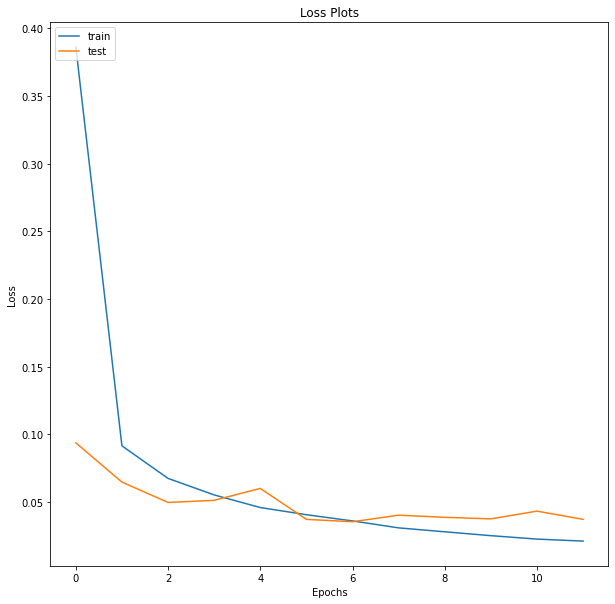

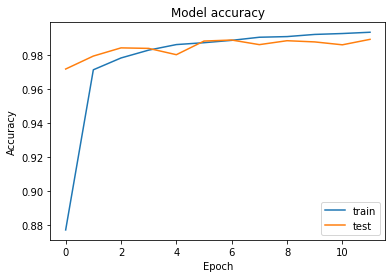

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Reshaping the data to fit it into the model
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Defining the Model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))      #Defining the First Convolutional Layer with Features and kernel size and activation RELu
model.add(MaxPooling2D(pool_size=(2, 2)))                                                 #Defining the First Max pooling layer
model.add(Conv2D(16, (5, 5), activation='relu'))                                          #Defining the Second Convolutional Layer with Features and kernel size and activation RELu
model.add(MaxPooling2D(pool_size=(2, 2)))                                                 #Defining the Second Max Pooling Layer
model.add(Flatten())                                                                      #Flattening the Model
model.add(Dense(120, activation='relu'))                                                  #Defining the hidden layer that is connected to max pooling layer with 120 nodes with RELu activation
model.add(Dense(84, activation='relu'))                                                   #Defining another hidden layer connected to hidden layer with 84 nodes with RELu activation
model.add(Dense(num_classes, activation='softmax'))                                       #Activating the model with softmax and number of classes which in our case is 10

#Compiling the Model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=0.001, decay=0.0),metrics=['accuracy'])

#Fitting the Model with all the training data, batch_size, epochs and test data
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

#Finding the score to find out accuracy of the model  
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])               #Printing Loss errors of the model on testing data 
print('Test accuracy:', score[1])           #Printing Accuracy of the model on testing data 

#Plotting the graph for the Loss Plots i.e. Learning Loss errors v/s Epochs 
fig=plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Plots")
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#Plotting the graph for the Accuracy of the testing data i.e. Accuracy of the model v/s Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
